In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import spei as si
import requests
import numpy as np

import json

import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.gridspec as gridspec
from scipy.stats import linregress 


In [2]:
import sys
print(sys.executable)

/Users/adriennekirk/miniconda3/bin/python


In [3]:
import sys
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 

kde = KDEhistogram(
    sdate='2002-03-01',
    edate='2024-05-31',
    lat=43.66,
    lon=-70.26
)
weekly = kde.weekly_dataframe()
# spring = kde.individual_dataframes('spring')
# summer = kde.individual_dataframes('summer')
# fall = kde.individual_dataframes('fall')



/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)


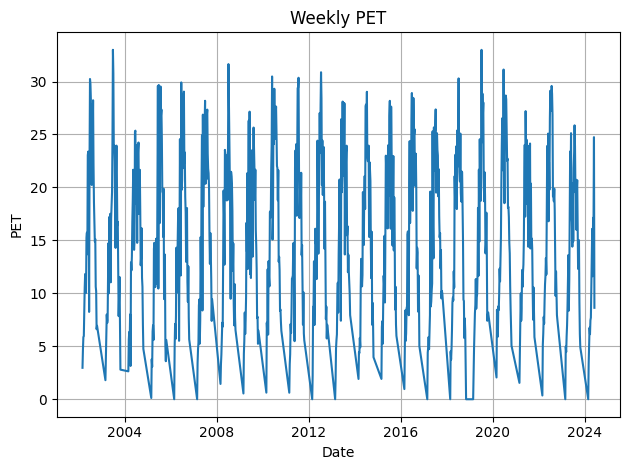

(793, 5)
date
2002-03-05     2.969698
2002-03-12     4.707171
2002-03-19     5.876666
2002-03-26     5.955999
2002-04-02     8.135287
                ...    
2024-05-07    11.613583
2024-05-14    17.132824
2024-05-21    16.709648
2024-05-28    24.748179
2024-06-04     8.635171
Name: pet, Length: 793, dtype: float64


In [4]:


month = weekly.index.month
day = weekly.index.day

remove_winter = (weekly['season'] == 'winter')

weekly = weekly[~remove_winter]
weekly.index = pd.to_datetime(weekly.index, errors='coerce')
weekly = weekly.sort_index()
# for year, group in weekly.groupby('year'):
#     plt.plot(group.index, group['pet'])
plt.plot(weekly.index, weekly['pet'])

plt.title("Weekly PET")
plt.xlabel("Date")
plt.ylabel("PET")
plt.grid(True)
plt.tight_layout()
plt.show()
print(weekly.shape)
print(weekly['pet'])



In [5]:
pet = weekly['pet']
f = 1  # days
series = pet.rolling(f, min_periods=f).sum()
series.head(40)


date
2002-03-05     2.969698
2002-03-12     4.707171
2002-03-19     5.876666
2002-03-26     5.955999
2002-04-02     8.135287
2002-04-09    10.526059
2002-04-16    11.827500
2002-04-23    11.748560
2002-04-30    10.030000
2002-05-07    15.212237
2002-05-14    15.730937
2002-05-21    13.693140
2002-05-28    23.052030
2002-06-04    23.384840
2002-06-11    20.364608
2002-06-18     8.246434
2002-06-25    22.686544
2002-07-02    30.241016
2002-07-09    29.775726
2002-07-16    28.261474
2002-07-23    23.129147
2002-07-30    20.234026
2002-08-06    27.813084
2002-08-13    24.638285
2002-08-20    28.231722
2002-08-27    22.127622
2002-09-03    18.569271
2002-09-10    16.720725
2002-09-17    14.893958
2002-09-24    15.126905
2002-10-01    10.627898
2002-10-08    10.193927
2002-10-15     6.614056
2002-10-22     6.936703
2003-03-04     1.800037
2003-03-11     3.796211
2003-03-18     5.344585
2003-03-25     8.000523
2003-04-01     7.196538
2003-04-08     7.453748
Name: pet, dtype: float64

In [6]:
series = series.loc[~series.index.duplicated(keep='first')]
spi3_gamma = si.spi(series, dist=stats.gamma, fit_freq=None)
weekly['pet gamma'] = spi3_gamma
weekly

/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)


FitError: Optimization converged to parameters that are outside the range allowed by the distribution.

In [ ]:
spi3_pearson = si.spi(series, dist=stats.pearson3, fit_freq="ME")
weekly['pet pearson'] = spi3_pearson
weekly

In [ ]:

tmin, tmax = pd.to_datetime(["2002", "2024"])
plt.figure(figsize=(8, 4))
first = True
for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['pet gamma'], color = 'darkorange', label = 'gamma' if first else None)
    plt.plot(group.index, group['pet pearson'], color = 'blue', linestyle = '--', label = 'pearson' if first else None)
    first = False
plt.plot(weekly.index, weekly['pet gamma'], color = 'darkorange', label = 'gamma')
plt.plot(weekly.index, weekly['pet pearson'], color = 'blue', linestyle = '--', label = 'pearson' )
plt.xlim(tmin, tmax)
plt.legend()
plt.grid()
plt.title("SPEI for PET Ithaca 2002 - 2024");

In [ ]:

f, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


for year, group in weekly.groupby('year'):
    spi3_pearson_year = spi3_pearson.loc[spi3_pearson.index.year == year]
    spi3_gamma_year = spi3_gamma.loc[spi3_gamma.index.year == year]

    si.plot.si(spi3_pearson_year, ax=ax[0], cmap="vik_r", label=year)
    si.plot.si(spi3_gamma_year, ax=ax[1], cmap="roma", label=year)
# si.plot.si(spi3_pearson, ax=ax[0], cmap="vik_r")
# si.plot.si(spi3_gamma, ax=ax[1], cmap="roma")

ax[0].set_xlim(pd.to_datetime(["2002", "2024"]))
[x.grid() for x in ax]
[ax[i].set_ylabel(n, fontsize=14) for i, n in enumerate(["Pearson", "Gamma"])];
plt.suptitle('Weekly Data')


In [ ]:
# Residuals

# for year, group in weekly.groupby('year'):
#     plt.plot(group.index, group['pet'])



spring_r = kde.residuals('spring', 'pet')
summer_r = kde.residuals('summer', 'pet')
fall_r = kde.residuals('fall', 'pet')

spring_r.index = pd.to_datetime(spring_r.index, errors='coerce')
summer_r.index = pd.to_datetime(summer_r.index, errors='coerce')
fall_r.index = pd.to_datetime(fall_r.index, errors='coerce')

weekly = pd.concat([spring_r, summer_r, fall_r])
weekly = weekly.sort_index() 

plt.figure(figsize=(10, 5))
for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['pet Residuals'])
plt.title("Weekly PET")
plt.xlabel("Date")
plt.ylabel("PET")
plt.grid(True)
plt.tight_layout()
plt.show()
print(weekly.head())

In [ ]:
pet = weekly['pet Residuals']
f = 1  # days
series = pet.rolling(f, min_periods=f).sum()
plt.scatter(pet.index, pet)

In [ ]:
series = series.loc[~series.index.duplicated(keep='first')]
spi3_gamma = si.spi(series, dist=stats.gamma)
weekly['pet gamma residuals'] = spi3_gamma

In [ ]:
spi3_pearson = si.spi(series, dist=stats.pearson3)
weekly['pet pearson residuals'] = spi3_pearson

In [ ]:
spi_normal = si.spi(series, dist = stats.norm)
weekly['pet normal residuals'] = spi_normal
weekly[['pet','pet Residuals']].to_csv('DataCut', index = True)


In [ ]:

tmin, tmax = pd.to_datetime(["2002", "2024"])
plt.figure(figsize=(8, 4))
first = True
for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['pet gamma residuals'], color = 'darkorange', label = 'gamma' if first else None)
    plt.plot(group.index, group['pet pearson residuals'], color = 'blue', linestyle = '--', label = 'pearson' if first else None)
    plt.plot(group.index, group['pet normal residuals'], color = 'm', linestyle = ':', label = 'normal' if first else None)
    first = False


plt.xlim(tmin, tmax)
plt.legend()
plt.grid()
plt.title("SPEI for PET Residuals Ithaca 2002 - 2024");

In [ ]:
f, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# choose a colormap to your liking:

for year, group in weekly.groupby('year'):
    spi3_pearson_year = spi3_pearson.loc[spi3_pearson.index.year == year]
    spi3_gamma_year = spi3_gamma.loc[spi3_gamma.index.year == year]
    spi_normal_year =  spi_normal.loc[spi_normal.index.year == year]
    si.plot.si(-spi3_pearson_year, ax=ax[0], cmap="vik_r")
    si.plot.si(-spi3_gamma_year, ax=ax[1], cmap="roma")
    si.plot.si(-spi_normal_year, ax=ax[2], cmap="seismic_r")


ax[0].set_xlim(pd.to_datetime(["2010", "2013"]))
for axis in ax:
    axis.invert_yaxis()
[x.grid() for x in ax]
[ax[i].set_ylabel(n, fontsize=14) for i, n in enumerate(["Pearson", "Gamma", "Normal"])];
plt.suptitle('Residuals')

In [ ]:
kde = KDEhistogram(
    sdate='2002-03-01',
    edate='2024-10-31',
    lat=43.66,
    lon=-70.26
)
# df = kde.url_to_dataframe()
# df['date'] = pd.to_datetime(df['date'])
# def get_season(date):
#     month = date.month
#     if 3 <= month <= 5:
#         return 'spring'
#     elif 6 <= month <= 8:
#         return 'summer'
#     elif 9 <= month <= 11:
#         return 'fall'
#     else:
#         return 'winter'


# def majority_season(df):
#     return df['season'].value_counts().idxmax()


# def weekly(df):
#     df['week'] = df['date'] - pd.to_timedelta((df['date'].dt.dayofweek - 1) % 7, unit='D')  # align to Tue
#     df['season'] = df['date'].apply(get_season)

#     # Ensure numeric columns
#     for col in ['pet', 'precip', 'vwc']:
#         df[col] = pd.to_numeric(df[col], errors='coerce')
#     weekly_season = df.groupby('week').apply(majority_season)
#     weekly_season.name = 'season'

#     season_df = df.set_index('date')
#     weekly_pet = season_df['pet'].resample('W-TUE').sum()
#     weekly_precip = season_df['precip'].resample('W-TUE').sum()
#     weekly_vwc = season_df['vwc'].resample('W-TUE').first()

#     combined = pd.concat([weekly_pet, weekly_precip, weekly_vwc], axis=1)
#     combined.columns = ['pet', 'precip', 'vwc']

#     # Add season
#     combined = combined.merge(weekly_season, left_index=True, right_index=True, how='left')
#     combined.loc[combined['precip'] < 0, 'precip'] = 0
#     return combined

# weekly(df).head(30)
spring_df = kde.individual_dataframes('spring')
summer_df = kde.individual_dataframes('summer')
df = kde.weekly_dataframe()
df.to_csv('Weekly Data',index =True)
print(spring_df.head(15))
print(summer_df)

In [ ]:
# Residuals

month = weekly.index.month
day = weekly.index.day

remove_winter = (weekly['season'] == 'winter')

weekly = weekly[~remove_winter]
weekly = weekly.sort_index()
# for year, group in weekly.groupby('year'):
#     plt.plot(group.index, group['pet'])
plt.plot(weekly.index, weekly['pet'])

plt.title("Weekly PET")
plt.xlabel("Date")
plt.ylabel("PET")
plt.grid(True)
plt.tight_layout()
plt.show()
print(weekly.shape)
print(weekly.head(36))

spring_r = kde.residuals('spring', 'pet')
summer_r = kde.residuals('summer', 'pet')
fall_r = kde.residuals('fall', 'pet')

spring_r.index = pd.to_datetime(spring_r.index, errors='coerce')
summer_r.index = pd.to_datetime(summer_r.index, errors='coerce')
fall_r.index = pd.to_datetime(fall_r.index, errors='coerce')

weekly = pd.concat([spring_r, summer_r, fall_r])
weekly = weekly.sort_index() 

plt.figure(figsize=(10, 5))
for year, group in weekly.groupby('year'):
    plt.plot(group.index, group['pet Residuals'])
plt.title("Weekly PET Residuals")
plt.xlabel("Date")
plt.ylabel("PET")
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataF

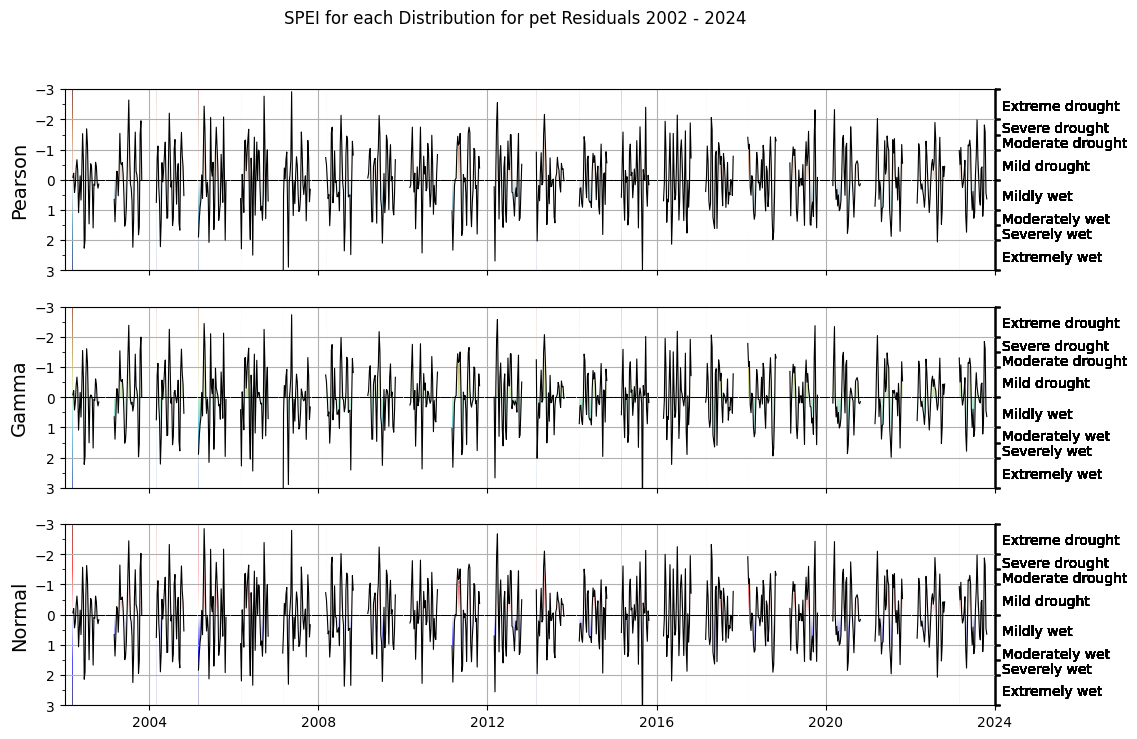

In [ ]:
import sys
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 
from FlashDroughts import DroughtDetection
drought = DroughtDetection(
    lat=43.66,
    lon=-70.26,
    residual_column='pet'
)


drought.spei_plot(2,'pet Residuals', 2002, 2024)
# print(drought.normal(2, 'pet Residuals'))

In [ ]:
weekly = drought.residual_dataframe()
weekly

,pet,precip,vwc,season,year,pet Residuals,pet Residuals normal,pet Residuals pearson,pet Residuals gamma
date,,,,,,,,,
2002-03-05,2.969698,0.990112,0.19,spring,2002,0.075277,NaN,NaN,NaN
2002-03-12,4.707171,0.449951,0.19,spring,2002,0.507137,0.062822,0.084071,0.082039
2002-03-19,5.876666,0.440063,0.19,spring,2002,0.371019,0.200873,0.221359,0.219607
2002-03-26,5.955999,0.700195,0.20,spring,2002,-0.855260,-0.435084,-0.417886,-0.420067
2002-04-02,8.135287,1.940064,0.21,spring,2002,0.018414,-0.264485,-0.187005,-0.186995
...,...,...,...,...,...,...,...,...,...
2024-10-01,12.212710,1.790527,0.08,fall,2024,-0.709163,-0.709408,-0.696377,-0.703463
2024-10-08,9.354923,0.600098,0.13,fall,2024,-1.969200,-1.009637,-1.010784,-1.011119
2024-10-15,8.084422,1.049912,0.18,fall,2024,-1.641950,-1.391718,-1.418829,-1.406438


/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataF

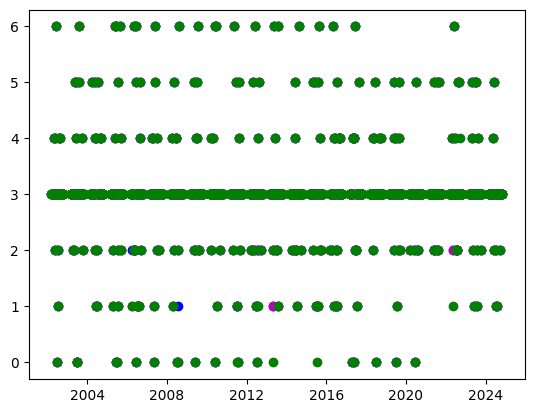

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 
from FlashDroughts import DroughtDetection
drought = DroughtDetection(
    lat=43.66,
    lon=-70.26,
    residual_column='pet'
)
weekly = drought.categories(2,'pet Residuals',['gamma', 'normal', 'pearson'])
plt.scatter(weekly.index, weekly['pet Residuals gamma category'], color = 'blue')
plt.scatter(weekly.index, weekly['pet Residuals normal category'], color = 'm')
plt.scatter(weekly.index, weekly['pet Residuals pearson category'], color = 'g')

In [2]:
pet_weekly = weekly[['pet', 'pet Residuals', 'pet Residuals pearson', 'pet Residuals pearson z-score', 'pet Residuals pearson category']]
pet_weekly.head(25)

,pet,pet Residuals,pet Residuals pearson,pet Residuals pearson z-score,pet Residuals pearson category
date,,,,,
2002-03-12,4.707171,0.507137,0.084071,0.135712,3
2002-03-19,5.876666,0.371019,0.221359,0.094426,3
2002-03-26,5.955999,-0.855260,-0.417886,-0.276141,3
2002-04-02,8.135287,0.018414,-0.187005,-0.012380,3
2002-04-09,10.526059,1.103573,0.377075,0.316981,3
2002-04-16,11.827500,1.099402,0.667716,0.315711,3
2002-04-23,11.748560,-0.285152,0.291825,-0.104168,3
2002-04-30,10.030000,-3.309325,-1.086583,-1.010415,4
2002-05-07,15.212237,0.567299,-0.469396,0.153969,3


/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataF

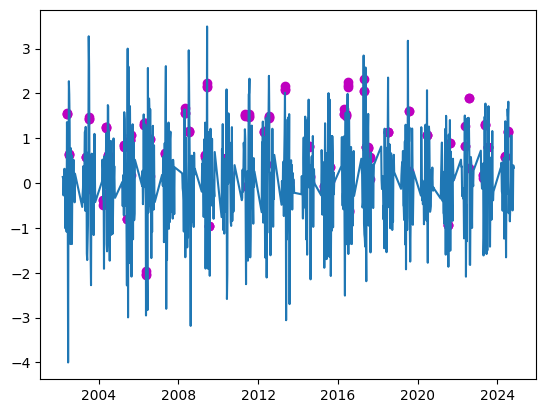

In [3]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 
from FlashDroughts import DroughtDetection
drought = DroughtDetection(
    lat=43.66,
    lon=-70.26,
    residual_column='pet'
)
weekly = drought.categories(2,'pet Residuals',['gamma', 'normal', 'pearson'])
two_weeks = drought.onset_two_weeks(2,'pet Residuals',['gamma', 'normal', 'pearson'])
plt.plot(weekly.index, weekly['pet Residuals pearson z-score'])
plt.scatter(two_weeks['onset_date_two_weeks'], two_weeks['pet Residuals pearson z_score'], color = 'm')




In [10]:

drought.onset_two_weeks(2,'pet Residuals',['gamma', 'normal', 'pearson'])

/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly[f'{column} {function} z-score'] = stats.norm.ppf(cdf_vals)


,onset_date_two_weeks,pet Residuals pearson category,pet Residuals pearson z_score
0,2002-06-04,6,1.549667
1,2002-07-02,2,0.651346
2,2003-05-13,5,0.589217
3,2003-07-01,3,1.421789
4,2003-07-22,5,-0.087502
...,...,...,...
186,2023-04-11,5,0.180997
187,2023-05-30,3,1.317032
188,2023-07-25,3,0.800151
189,2024-05-28,5,0.577269


/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataF

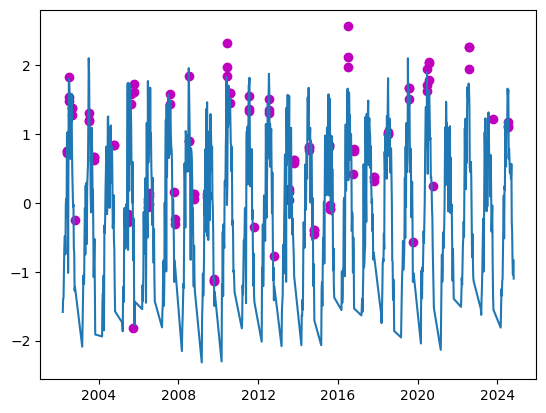

In [14]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 
from FlashDroughts import DroughtDetection
drought = DroughtDetection(
    lat=43.66,
    lon=-70.26,
    residual_column='pet'
)
weekly = drought.categories(2,'pet',['gamma', 'normal', 'pearson'])
two_weeks = drought.onset_two_weeks(2,'pet',['gamma', 'normal', 'pearson'])
plt.plot(weekly.index, weekly['pet pearson z-score'])
plt.scatter(two_weeks['onset_date_two_weeks'], two_weeks['pet pearson z_score'], color = 'm')




In [7]:
pet_weekly = weekly[['pet', 'pet', 'pet pearson', 'pet pearson z-score', 'pet pearson category']]
pet_weekly.head(25)

,pet,pet,pet pearson,pet pearson z-score,pet pearson category
date,,,,,
2002-03-12,4.707171,4.707171,NaN,-1.584324,5
2002-03-19,5.876666,5.876666,-0.009283,-1.391858,4
2002-03-26,5.955999,5.955999,0.361829,-1.378990,4
2002-04-02,8.135287,8.135287,-1.359826,-1.034291,4
2002-04-09,10.526059,10.526059,-0.362615,-0.673999,3
2002-04-16,11.827500,11.827500,0.339013,-0.484942,3
2002-04-23,11.748560,11.748560,0.555607,-0.496276,3
2002-04-30,10.030000,10.030000,0.234642,-0.747330,3
2002-05-07,15.212237,15.212237,-0.954543,-0.014008,3


In [11]:
drought.onset_two_weeks(2,'pet',['gamma', 'normal', 'pearson'])

/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly[f'{column} {function} z-score'] = stats.norm.ppf(cdf_vals)


,onset_date_two_weeks,pet pearson category,pet pearson z_score
0,2002-06-04,4,0.753800
1,2002-07-09,3,1.482484
2,2002-08-20,3,1.270832
3,2003-07-01,2,1.184089
4,2003-10-14,5,0.667643
...,...,...,...
106,2020-08-04,3,2.027808
107,2020-10-13,5,0.238547
108,2022-08-02,3,2.252976
109,2023-10-10,5,1.220217


In [2]:
drought.onset_two_weeks(2,'pet Residuals',['gamma'])


/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly[f'{column} {function} z-score'] = stats.norm.ppf(cdf_vals)


,onset_date_two_weeks,pet Residuals gamma category,pet Residuals gamma z_score
0,2002-06-04,6,1.549667
1,2002-07-02,2,0.651346
2,2003-05-13,5,0.589217
3,2003-07-01,3,1.421789
4,2003-07-22,5,-0.087502
...,...,...,...
58,2023-04-11,5,0.184038
59,2023-05-30,3,1.297453
60,2023-07-25,3,0.814379
61,2024-05-28,5,0.593951


/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_season = df.groupby('week').apply(majority_season)
/Users/adriennekirk/Desktop/Flash Droughts/FlashDroughts.py:63: FutureWarning: DataF

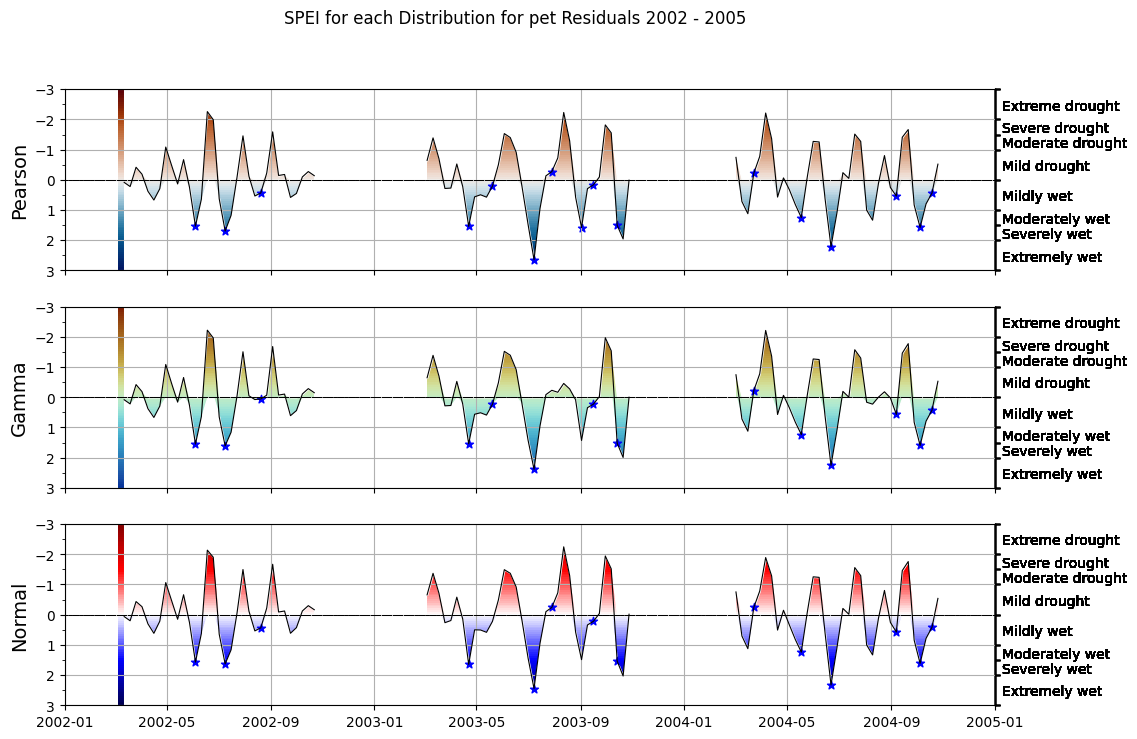

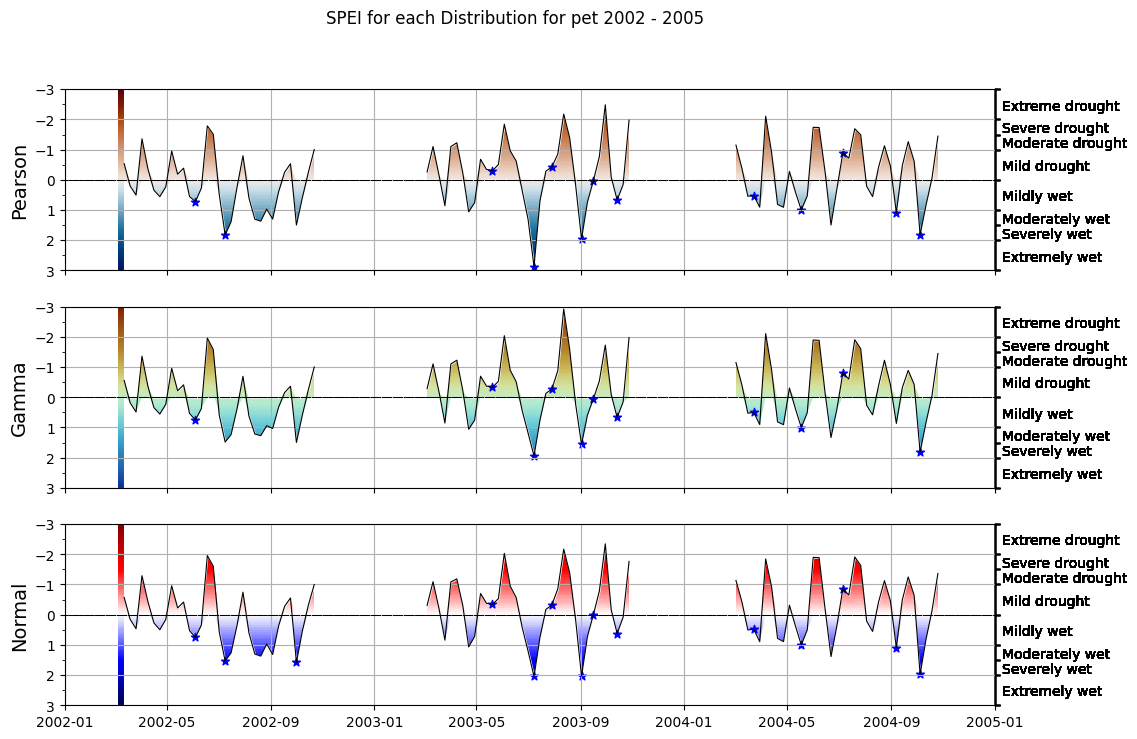

In [5]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram 
from FlashDroughts import DroughtDetection
drought = DroughtDetection(
    lat=43.66,
    lon=-70.26,
    residual_column='pet'
)
drought.two_week_spei_plot(2,'pet Residuals', ['gamma', 'normal', 'pearson'], 2002, 2005)
# drought.categories(1,'pet Residuals', ['gamma', 'normal', 'pearson']).head(25)
drought.two_week_spei_plot(2,'pet', ['gamma', 'normal', 'pearson'], 2002, 2005)

In [3]:
drought.residual_dataframe().head(50)

,pet,precip,vwc,season,year,pet Residuals,pet Residuals normal,pet Residuals pearson,pet Residuals gamma,pet Residuals gamma z-score,pet Residuals gamma category,pet Residuals normal z-score,pet Residuals normal category,pet Residuals pearson z-score,pet Residuals pearson category
date,,,,,,,,,,,,,,,
2002-03-05,2.969698,0.990112,0.19,spring,2002,0.075277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-12,4.707171,0.449951,0.19,spring,2002,0.507137,0.062822,0.084071,0.082039,-0.767445,3.0,-0.956506,3.0,-0.767439,3.0
2002-03-19,5.876666,0.440063,0.19,spring,2002,0.371019,0.200873,0.221359,0.219607,-1.104528,4.0,-1.394859,4.0,-1.104519,4.0
2002-03-26,5.955999,0.700195,0.20,spring,2002,-0.855260,-0.435084,-0.417886,-0.420067,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-02,8.135287,1.940064,0.21,spring,2002,0.018414,-0.264485,-0.187005,-0.186995,-1.693663,5.0,-2.437288,6.0,-1.692810,5.0
2002-04-09,10.526059,0.529999,0.19,spring,2002,1.103573,0.303326,0.377075,0.377078,-0.098720,3.0,-0.178960,3.0,-0.098513,3.0
2002-04-16,11.827500,1.340179,0.15,spring,2002,1.099402,0.616673,0.667716,0.667713,-0.102683,3.0,-0.183089,3.0,-0.102476,3.0
2002-04-23,11.748560,0.210022,0.19,spring,2002,-0.285152,0.214121,0.291825,0.291828,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-30,10.030000,1.699829,0.15,spring,2002,-3.309325,-1.063845,-1.086583,-1.086570,NaN,NaN,NaN,NaN,NaN,NaN
